In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import pickle
from datetime import datetime

In [2]:
# This script assumes

# 1. the waiting time inbetween two test runs are larger than the waiting times within 
# each test run, e.g., 30 between test runs and 20 in between individual 
waiting_times_between_runs = 20
#waiting_times_individual_actions = 20


# 2. there are a certain number of test runs (those runs that last the longest)
number_of_tests = 1

# 3. when is the spike done?
spike_done = 20


## This script should be executed once per input file

In [3]:
ls ../Results-Raw/*

../Results-Raw/log - discusssion.txt

../Results-Raw/site1:
30Run1.csv      30runsite1.png  old/

../Results-Raw/site2:
30run1.csv  30run1.png

../Results-Raw/site3:
30run1.csv  30run1.png

../Results-Raw/site4:
30run1.csv  30run1.png

../Results-Raw/site5:
30run1.csv  30run1.png

../Results-Raw/site6:
30run1.csv  30run1.png


In [4]:

# File path to the CSV file
csv_file_path1 = '../Results-Raw/site1/30Run1.csv'
csv_file_path2 = '../Results-Raw/site2/30Run1.csv'
csv_file_path5 = '../Results-Raw/site5/30Run1.csv'

# Define the columns to import
columns_to_import = [1,2,3,5,6,8,9]

# Define the column names to rename the imported columns
column_names = ['time', 'minutes', 'dateTime', 'Clientcurrent', 'Clientpower','Servercurrent','Serverpower']

# Step 1: Load the CSV file with a suitable delimiter
df1 = pd.read_csv(csv_file_path1, delimiter=';', decimal=",", usecols=columns_to_import ,header=0, names=column_names, skipinitialspace=True)
df2 = pd.read_csv(csv_file_path2, delimiter=';', decimal=",", usecols=columns_to_import ,header=0, names=column_names, skipinitialspace=True)
df5 = pd.read_csv(csv_file_path5, delimiter=';', decimal=",", usecols=columns_to_import ,header=0, names=column_names, skipinitialspace=True)


In [5]:
print(df1.dtypes,df2.dtypes,df5.dtypes)

time             float64
minutes          float64
dateTime         float64
Clientcurrent    float64
Clientpower      float64
Servercurrent    float64
Serverpower      float64
dtype: object time             float64
minutes          float64
dateTime         float64
Clientcurrent    float64
Clientpower      float64
Servercurrent    float64
Serverpower      float64
dtype: object time             float64
minutes          float64
dateTime         float64
Clientcurrent    float64
Clientpower      float64
Servercurrent    float64
Serverpower      float64
dtype: object


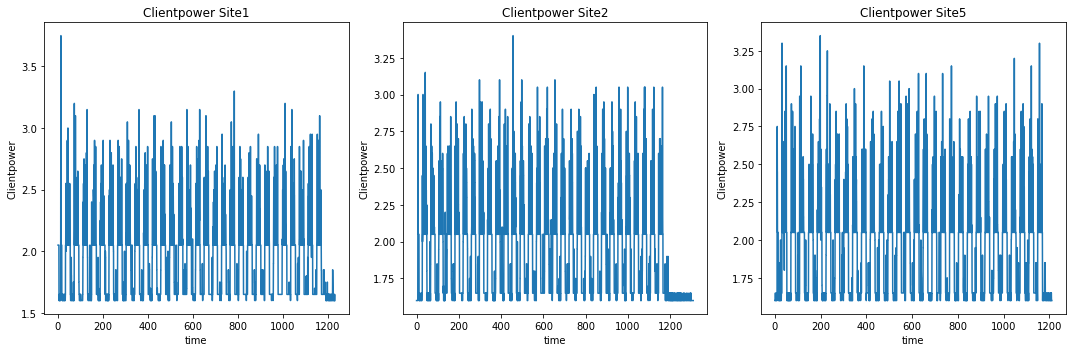

In [6]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot each Clientpower on a separate subplot
sns.lineplot(data=df1, x='time', y='Clientpower', ax=axes[0])
axes[0].set_title('Clientpower Site1')

sns.lineplot(data=df2, x='time', y='Clientpower', ax=axes[1])
axes[1].set_title('Clientpower Site2')

sns.lineplot(data=df5, x='time', y='Clientpower', ax=axes[2])
axes[2].set_title('Clientpower Site5')

# Adjust layout
plt.tight_layout()
plt.show()

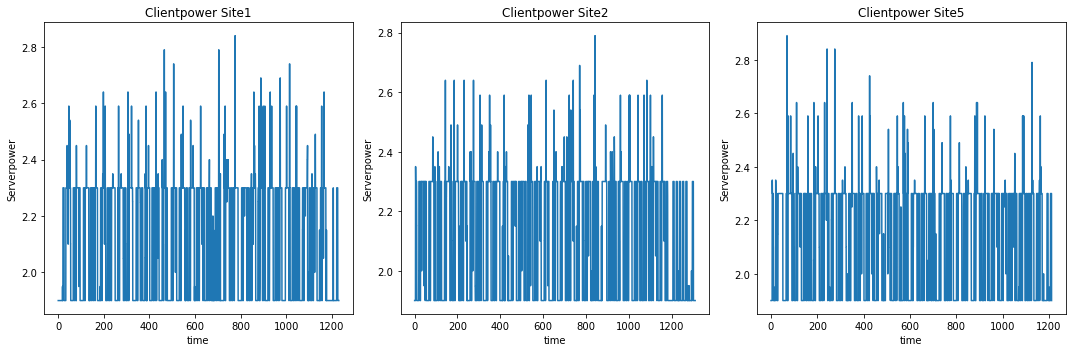

In [7]:
#sns.lineplot(data=df1,x="time",y="Serverpower")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot each Clientpower on a separate subplot
sns.lineplot(data=df1, x='time', y='Serverpower', ax=axes[0])
axes[0].set_title('Clientpower Site1')

sns.lineplot(data=df2, x='time', y='Serverpower', ax=axes[1])
axes[1].set_title('Clientpower Site2')

sns.lineplot(data=df5, x='time', y='Serverpower', ax=axes[2])
axes[2].set_title('Clientpower Site5')

# Adjust layout
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='time', ylabel='Clientpower'>

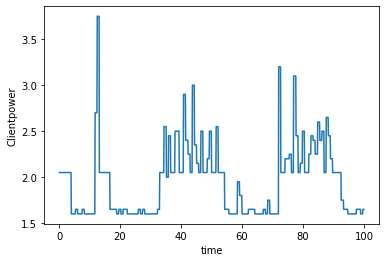

In [8]:
sns.lineplot(data=df1[df1['time']<100],x="time",y="Clientpower")

In [93]:
# For each data frame 
# 1,2,5
# --- 3,4,6
site_number = 5
df = df5


site = 'site'+str(site_number)
'''
Site 1 = our own theme with our own plugin 
Site 2 = our own theme with no plugin 
Site 3 = 2023 with no plugin 
Site 4 = 2023 with Smush plugin 
Site 5 = our own with Smush plugin
Site 6 = 2023 with own plugin
'''
if site_number == 1:
    plugin = 'Our'
    theme = 'Our'
elif site_number == 2:
    plugin = '-'
    theme = 'Our'
elif site_number == 3:
    plugin = '-'
    theme = '2023'
elif site_number == 4:
    plugin = 'Smush'
    theme = '2023'
elif site_number == 5:
    plugin = 'Smush'
    theme = 'Our'
elif site_number == 6:
    plugin = 'Our'
    theme = '2023'

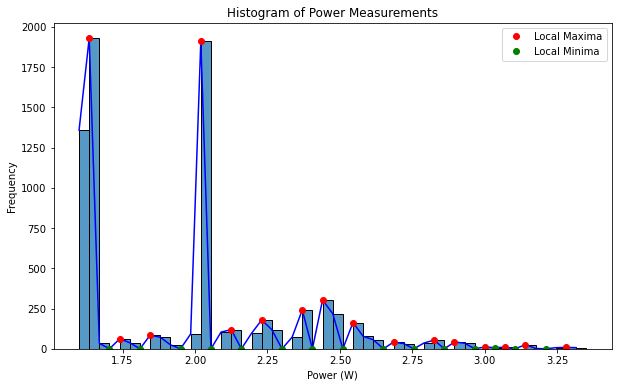

Local Maxima (Power values): [1.635 1.74  1.845 2.02  2.125 2.23  2.37  2.44  2.545 2.685 2.825 2.895
 3.    3.07  3.14  3.28 ]
Local Minima (Power values between peaks): [1.705 1.81  1.95  2.055 2.16  2.3   2.405 2.51  2.65  2.755 2.86  2.965
 3.035 3.105 3.21 ]


In [94]:

# Step 1: Plot histogram of power values
plt.figure(figsize=(10, 6))
sns.histplot(df['Clientpower'], bins=50, kde=False)
plt.xlabel('Power (W)')
plt.ylabel('Frequency')
plt.title('Histogram of Power Measurements')

# Step 2: Create the histogram data
hist, bin_edges = np.histogram(df['Clientpower'], bins=50)

# Step 3: Find local maxima (peaks)
peaks, _ = find_peaks(hist)

# Step 4: Find local minima (valleys) by inverting the histogram
minima, _ = find_peaks(-hist)

# Step 5: Find minima between each pair of consecutive maxima
minima_between_peaks = []
for i in range(len(peaks) - 1):
    # Find minima between peak i and peak i+1
    minima_in_range = [m for m in minima if peaks[i] < m < peaks[i + 1]]
    if minima_in_range:
        minima_between_peaks.append(minima_in_range[0])  # Append the first minima between the peaks

# Step 6: Plot the histogram curve
plt.plot(bin_edges[:-1], hist, color='blue')

# Mark the local maxima
plt.plot(bin_edges[peaks], hist[peaks], 'ro', label="Local Maxima")

# Mark the local minima between peaks
plt.plot(bin_edges[minima_between_peaks], hist[minima_between_peaks], 'go', label="Local Minima")

# Step 7: Show the plot with annotations
plt.legend(loc='upper right')
plt.show()

# Output the values of the minima and maxima
print("Local Maxima (Power values):", bin_edges[peaks])
print("Local Minima (Power values between peaks):", bin_edges[minima_between_peaks])



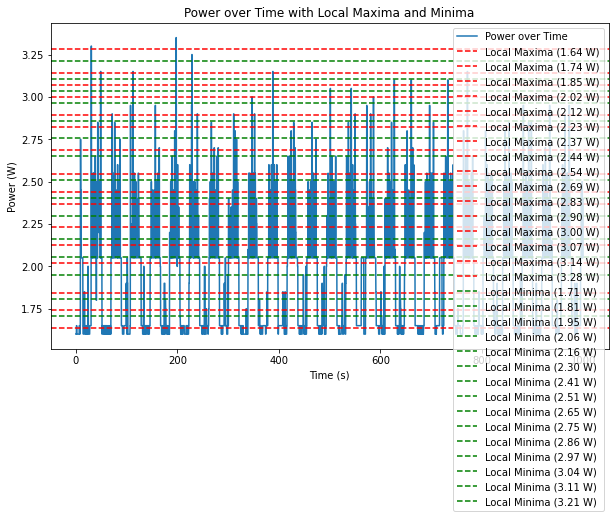

In [95]:
# Visual confirmation of thresholds

# Step 1: Plot the time series of power
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['time']<1000], x="time", y="Clientpower", label="Power over Time")

# Convert the bin_edges for maxima and minima to actual power values
local_maxima_values = bin_edges[peaks]
local_minima_values = bin_edges[minima_between_peaks]

# Step 2: Plot horizontal lines at the local maxima values (in red)
for value in local_maxima_values:
    plt.axhline(y=value, color='red', linestyle='--', label=f'Local Maxima ({value:.2f} W)')

# Step 3: Plot horizontal lines at the local minima values (in green)
for value in local_minima_values:
    plt.axhline(y=value, color='green', linestyle='--', label=f'Local Minima ({value:.2f} W)')

# Step 4: Show the plot with the horizontal lines for both maxima and minima
plt.title('Power over Time with Local Maxima and Minima')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.legend(loc='upper right')
plt.show()

In [96]:

# Define the waiting threshold as the first local minimum between the first two peaks
waiting_threshold = bin_edges[minima_between_peaks[0]]  # The first minimum between the first two peaks


<Figure size 720x432 with 0 Axes>

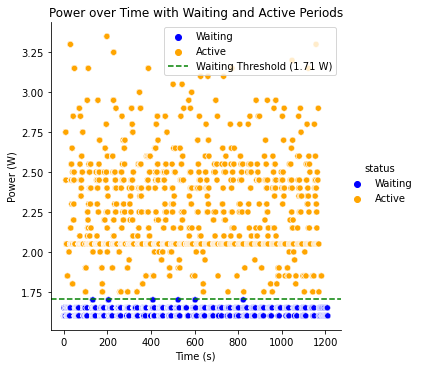

In [97]:
# Define the active measurements and waiting measurements using the waiting_threshold:

# Step 1: Classify each point in the time series as 'Waiting' or 'Active'
df['status'] = df['Clientpower'].apply(lambda x: 'Waiting' if x < waiting_threshold else 'Active')

# Step 2: Plot the time series, color-coding the waiting and active periods
plt.figure(figsize=(10, 6))
#sns.relplot(data=df[df['time']<500], x="time", y="power", hue='status', palette={'Waiting': 'blue', 'Active': 'orange'}, legend='full')
sns.relplot(data=df, x="time", y="Clientpower", hue='status', palette={'Waiting': 'blue', 'Active': 'orange'}, legend='full')

# Plot the threshold as a horizontal line
plt.axhline(y=waiting_threshold, color='green', linestyle='--', label=f'Waiting Threshold ({waiting_threshold:.2f} W)')

# Step 3: Show the plot
plt.title('Power over Time with Waiting and Active Periods')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.legend(loc='upper right')
plt.show()

# Optional: You can also isolate the waiting and active periods
waiting_periods = df[df['status'] == 'Waiting']
active_periods = df[df['status'] == 'Active']


<Figure size 720x432 with 0 Axes>

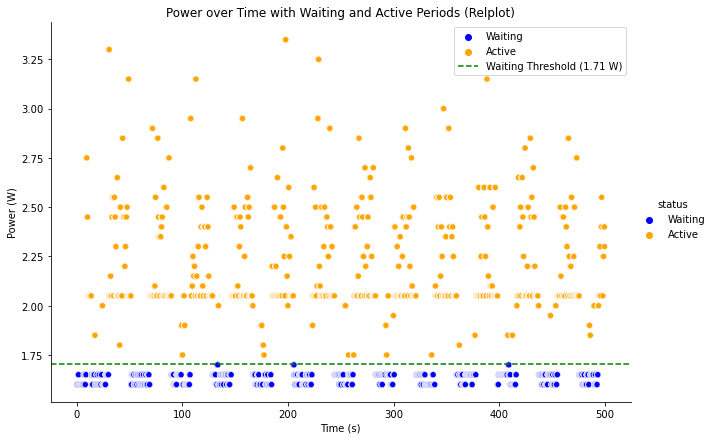

In [98]:
# Ensure the 'status' column is created using the correct threshold
#waiting_threshold = bin_edges[minima_between_peaks[0]]  # The first minimum between the first two peaks
#df['status'] = df['power'].apply(lambda x: 'Waiting' if x < waiting_threshold else 'Active')

# Create the relplot to visualize the waiting and active periods
plt.figure(figsize=(10, 6))
sns.relplot(data=df[df['time'] < 500], x="time", y="Clientpower", hue='status', 
            palette={'Waiting': 'blue', 'Active': 'orange'}, height=6, aspect=1.5)

# Plot the threshold as a horizontal line
plt.axhline(y=waiting_threshold, color='green', linestyle='--', label=f'Waiting Threshold ({waiting_threshold:.2f} W)')

# Show the plot
plt.title('Power over Time with Waiting and Active Periods (Relplot)')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.legend(loc='upper right')
plt.show()

In [99]:
local_waiting_time_minima = [waiting_times_between_runs]

In [100]:
# Step 1: Calculate Waiting Time Durations
df['status_shift'] = df['status'].shift(1)
df['waiting_group'] = (df['status'] != df['status_shift']).cumsum()  # Group consecutive waiting periods

# Filter the waiting periods and calculate their durations
waiting_durations = df[df['status'] == 'Waiting'].groupby('waiting_group').agg({'time': ['min', 'max']})
waiting_durations['duration'] = waiting_durations['time']['max'] - waiting_durations['time']['min']

# Extract the durations for further analysis
waiting_times = waiting_durations['duration'].values

# Step 1: Calculate Waiting Time Durations
waiting_durations = df[df['status'] == 'Waiting'].groupby('waiting_group').agg({'time': ['min', 'max']})
waiting_durations.columns = ['time_min', 'time_max']  # Simplify column names
waiting_durations['duration'] = waiting_durations['time_max'] - waiting_durations['time_min']

# Step 2: Classify Waiting Periods Based on Minima
def classify_waiting_time(duration):
    # Find the closest minimum in the local_waiting_time_minima list
    for i, minima in enumerate(local_waiting_time_minima):
        if duration <= minima:
            return f'Waiting Group {i+1}'
    return f'Waiting Group {len(local_waiting_time_minima)+1}'

# Apply the classification to the waiting periods
waiting_durations['category'] = waiting_durations['duration'].apply(classify_waiting_time)

# Merge this category information back into the original dataframe
df = pd.merge(df, waiting_durations[['category']], left_on='waiting_group', right_index=True, how='left')

# Step 3: Create the hue column ('Active' or waiting group)
df['hue'] = df.apply(lambda row: 'Active' if row['status'] == 'Active' else row['category'], axis=1)


<Figure size 1728x432 with 0 Axes>

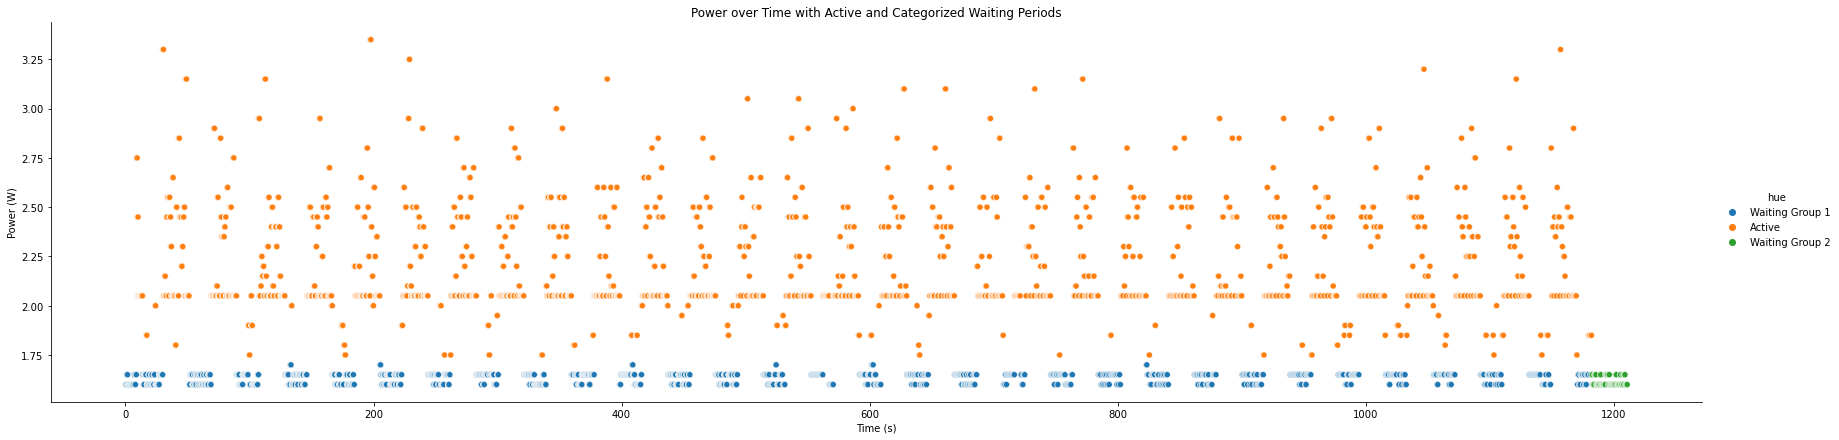

,time,minutes,dateTime,Clientcurrent,Clientpower,Servercurrent,Serverpower,status,status_shift,waiting_group,category,hue
0,0.149,0.002483,1.727973e+09,0.32,1.6,0.38,1.9,Waiting,NaN,1,Waiting Group 1,Waiting Group 1
1,0.254,0.004233,1.727973e+09,0.32,1.6,0.38,1.9,Waiting,Waiting,1,Waiting Group 1,Waiting Group 1
2,0.354,0.005900,1.727973e+09,0.32,1.6,0.38,1.9,Waiting,Waiting,1,Waiting Group 1,Waiting Group 1
3,0.453,0.007550,1.727973e+09,0.32,1.6,0.38,1.9,Waiting,Waiting,1,Waiting Group 1,Waiting Group 1
4,0.554,0.009233,1.727973e+09,0.32,1.6,0.38,1.9,Waiting,Waiting,1,Waiting Group 1,Waiting Group 1


In [101]:
# Visual identification of the spike
# update the "spike_done" in the second cell

# Step 4: Create a relplot with hue for active and waiting categories
plt.figure(figsize=(24, 6))
sns.relplot(data=df, x="time", y="Clientpower", hue='hue', height=6, aspect=4)
# sns.relplot(data=df, x="time", y="power", hue='hue',  height=6, aspect=1.5)

# Show the plot
plt.title('Power over Time with Active and Categorized Waiting Periods')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.savefig('numberofruns.png')
plt.show()

# Optional: Display a portion of the dataframe to check the classification
df.head()


In [102]:
df = df[df['time']>spike_done]

<Figure size 1440x432 with 0 Axes>

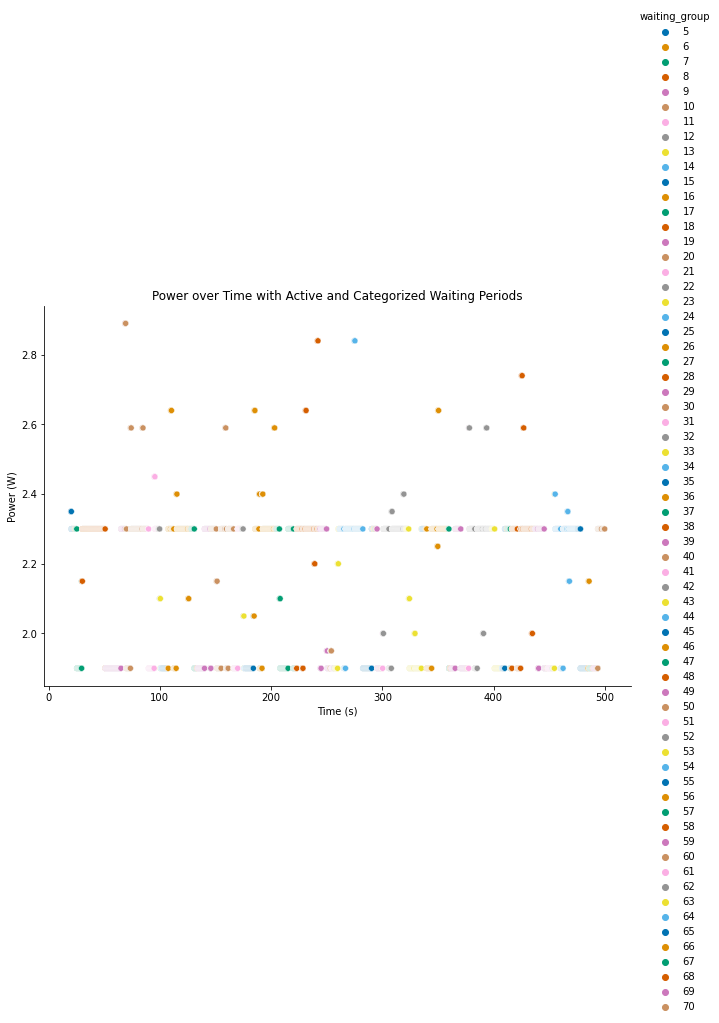

In [103]:
# Visual confirmation that the spike is removed

x=0
# Step 4: Create a relplot with hue for active and waiting categories
plt.figure(figsize=(20, 6))
sns.relplot(data=df[(df['time']>=x) & (df['time']<x+500)], x="time", y="Serverpower", hue='waiting_group',  height=6, aspect=1.5, palette='colorblind')
# sns.relplot(data=df, x="time", y="power", hue='hue',  height=6, aspect=1.5)

# Show the plot
plt.title('Power over Time with Active and Categorized Waiting Periods')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.savefig("site3-color.png")
plt.show()

# Optional: Display a portion of the dataframe to check the classification
#df[df['status']=='Active'].head(100)

<Figure size 720x72 with 0 Axes>

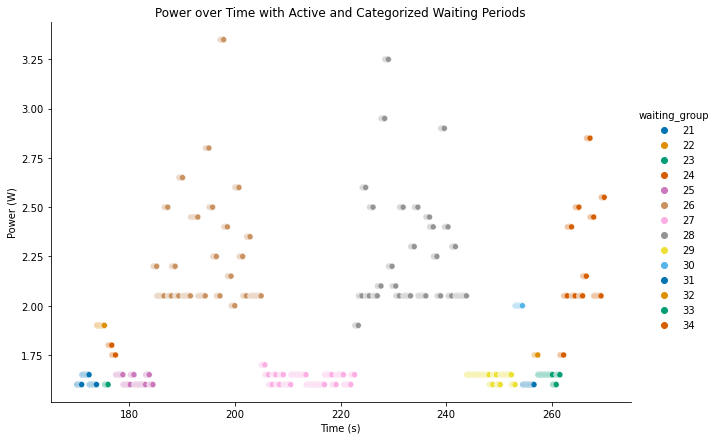

<Figure size 720x72 with 0 Axes>

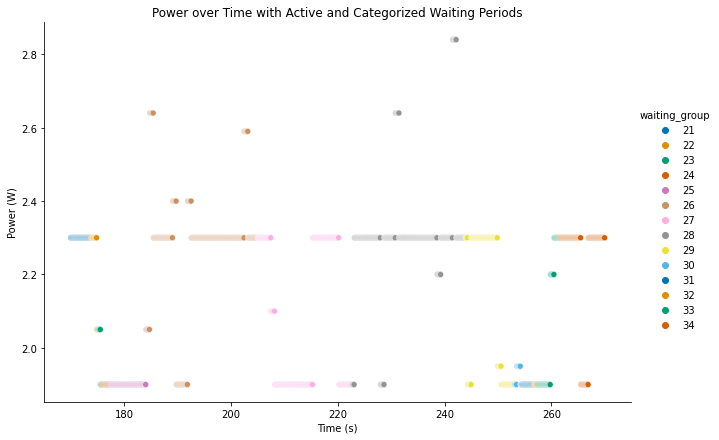

In [104]:
# Visual confirmation that the spike is removed

x=170
# Step 4: Create a relplot with hue for active and waiting categories
plt.figure(figsize=(10, 1))
sns.relplot(data=df[(df['time']>=x) & (df['time']<x+100)], x="time", y="Clientpower", hue='waiting_group',  height=6, aspect=1.5, palette='colorblind')
# sns.relplot(data=df, x="time", y="power", hue='hue',  height=6, aspect=1.5)

# Show the plot
plt.title('Power over Time with Active and Categorized Waiting Periods')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
#plt.savefig("site3-color.png")
plt.show()

# Optional: Display a portion of the dataframe to check the classification
#df[df['status']=='Active'].head(100)

# Visual confirmation that the spike is removed


# Step 4: Create a relplot with hue for active and waiting categories
plt.figure(figsize=(10,1))
sns.relplot(data=df[(df['time']>=x) & (df['time']<x+100)], x="time", y="Serverpower", hue='waiting_group',  height=6, aspect=1.5, palette='colorblind')
# sns.relplot(data=df, x="time", y="power", hue='hue',  height=6, aspect=1.5)

# Show the plot
plt.title('Power over Time with Active and Categorized Waiting Periods')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
#plt.savefig("site3-color.png")
plt.show()

# Optional: Display a portion of the dataframe to check the classification
#df[df['status']=='Active'].head(100)



In [105]:
print(df[ (df['waiting_group']==43)][['time','Clientpower','Serverpower']])

         time  Clientpower  Serverpower
3211  321.253         1.65          2.3
3212  321.354         1.65          2.3
3213  321.452         1.65          2.3
3214  321.554         1.65          2.3
3215  321.650         1.65          2.3
...       ...          ...          ...
3348  334.951         1.60          1.9
3349  335.054         1.60          1.9
3350  335.154         1.60          2.3
3351  335.250         1.60          2.3
3352  335.354         1.60          2.3

[142 rows x 3 columns]


In [106]:
#df.to_csv('../Results-Energy/data.csv',index=False)

<Figure size 720x432 with 0 Axes>

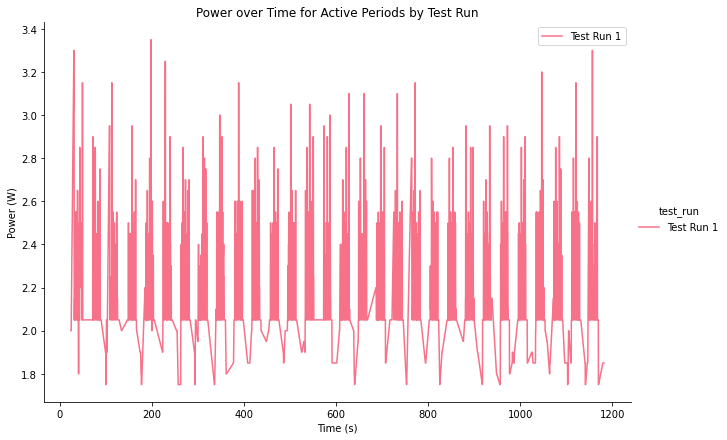

,time,Clientpower,status,category,test_run
199,20.053,1.6,Waiting,Waiting Group 1,Test Run 1
200,20.152,1.6,Waiting,Waiting Group 1,Test Run 1
201,20.254,1.6,Waiting,Waiting Group 1,Test Run 1
202,20.354,1.6,Waiting,Waiting Group 1,Test Run 1
203,20.452,1.6,Waiting,Waiting Group 1,Test Run 1


In [107]:



# Step 1: Identify the indices where we encounter 'Waiting Group 2'
waiting_group_2_indices = df[df['category'] == 'Waiting Group 2'].index

# Step 2: Initialize a new column 'test_run' to label the test runs
df['test_run'] = None

# Step 3: Loop through the waiting_group_2_indices and assign test runs
previous_idx = 0
for i, idx in enumerate(waiting_group_2_indices):
    # Assign the 'test_run' label to all active periods before the first occurrence of Waiting Group 2
    df.loc[previous_idx:idx, 'test_run'] = f'Test Run {i+1}'
    previous_idx = idx + 1  # Move the index forward

# Handle any remaining active periods after the last occurrence of Waiting Group 2
df.loc[previous_idx:, 'test_run'] = f'Test Run {len(waiting_group_2_indices) + 1}'

# Step 4: Filter the active periods
active_df = df[df['status'] == 'Active']

# Step 5: Plot the active periods with different test runs colored
plt.figure(figsize=(10, 6))
sns.relplot(data=active_df, x="time", y="Clientpower", hue='test_run', kind="line", palette='husl', height=6, aspect=1.5)

# Show the plot
plt.title('Power over Time for Active Periods by Test Run')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.legend(loc='upper right')
plt.show()

# Display the first few rows to check the test_run column
df[['time', 'Clientpower', 'status', 'category', 'test_run']].head()

<Figure size 720x432 with 0 Axes>

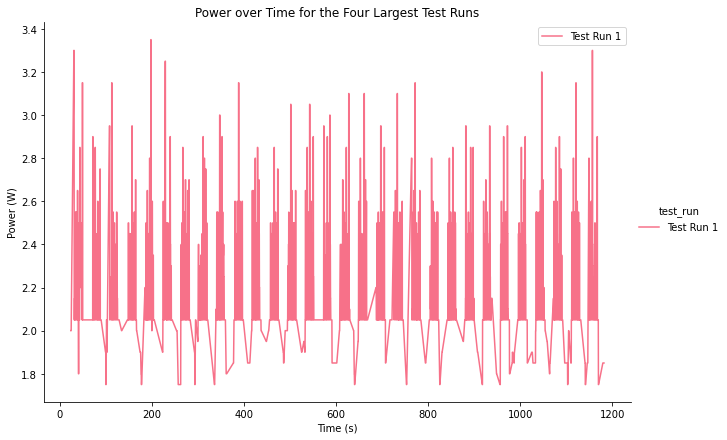

,time,minutes,dateTime,Clientcurrent,Clientpower,Servercurrent,Serverpower,status,status_shift,waiting_group,category,hue,test_run
199,20.053,0.334217,1.727973e+09,0.32,1.6,0.47,2.35,Waiting,Waiting,5,Waiting Group 1,Waiting Group 1,Test Run 1
200,20.152,0.335867,1.727973e+09,0.32,1.6,0.47,2.35,Waiting,Waiting,5,Waiting Group 1,Waiting Group 1,Test Run 1
201,20.254,0.337567,1.727973e+09,0.32,1.6,0.47,2.35,Waiting,Waiting,5,Waiting Group 1,Waiting Group 1,Test Run 1
202,20.354,0.339233,1.727973e+09,0.32,1.6,0.47,2.35,Waiting,Waiting,5,Waiting Group 1,Waiting Group 1,Test Run 1
203,20.452,0.340867,1.727973e+09,0.32,1.6,0.47,2.35,Waiting,Waiting,5,Waiting Group 1,Waiting Group 1,Test Run 1


In [108]:
# Drop fake test runs (i.e., the small ones)


# Step 1: Calculate the duration of each test run
test_run_durations = df.groupby('test_run').agg({'time': ['min', 'max']})
test_run_durations['duration'] = test_run_durations['time']['max'] - test_run_durations['time']['min']

# Step 2: Sort the test runs by duration and select the four largest
largest_test_runs = test_run_durations.nlargest(number_of_tests, 'duration').index

# Step 3: Filter the original dataframe to only include the four largest test runs
df_largest = df[df['test_run'].isin(largest_test_runs)]

# Step 4: Plot the data for the four largest test runs
plt.figure(figsize=(10, 6))
sns.relplot(data=df_largest[df_largest['status'] == 'Active'], x="time", y="Clientpower", hue='test_run', kind="line", palette='husl', height=6, aspect=1.5)

# Show the plot
plt.title('Power over Time for the Four Largest Test Runs')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.legend(loc='upper right')
plt.show()

# Display the new dataframe containing only the four largest test runs
df_largest.head()


In [109]:
df_largest.head()

,time,minutes,dateTime,Clientcurrent,Clientpower,Servercurrent,Serverpower,status,status_shift,waiting_group,category,hue,test_run
199,20.053,0.334217,1.727973e+09,0.32,1.6,0.47,2.35,Waiting,Waiting,5,Waiting Group 1,Waiting Group 1,Test Run 1
200,20.152,0.335867,1.727973e+09,0.32,1.6,0.47,2.35,Waiting,Waiting,5,Waiting Group 1,Waiting Group 1,Test Run 1
201,20.254,0.337567,1.727973e+09,0.32,1.6,0.47,2.35,Waiting,Waiting,5,Waiting Group 1,Waiting Group 1,Test Run 1
202,20.354,0.339233,1.727973e+09,0.32,1.6,0.47,2.35,Waiting,Waiting,5,Waiting Group 1,Waiting Group 1,Test Run 1
203,20.452,0.340867,1.727973e+09,0.32,1.6,0.47,2.35,Waiting,Waiting,5,Waiting Group 1,Waiting Group 1,Test Run 1


In [110]:

#df_largest.to_csv('../Results-Energy/data.csv',index=False)
# df = df_largest

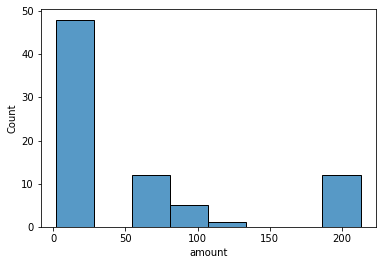

In [111]:
df_active = df_largest[df_largest['status']=='Active']

mean_client_array=[0]*(number_of_tests)
mean_server_array=[0]*(number_of_tests)
time_array =[0]*(number_of_tests)
df_active_grouped_by_run = df_active.groupby('test_run')
i=0
number_of_measures_in_waiting_group = []
for run_no, df_run in df_active_grouped_by_run:
    df_active_grouped_by_waiting_group = df_run.groupby('waiting_group')
    mean_client_list = []
    mean_server_list = []
    time_list = []
    for number,df_waiting_group in df_active_grouped_by_waiting_group:
        number_of_measures_in_waiting_group.append(df_waiting_group['Clientpower'].count())
        if df_waiting_group['Clientpower'].count()>50:
            #print(number,df_waiting_group)
            #print(df_waiting_group['power'].mean())
            mean_client_list.append(df_waiting_group['Clientpower'].mean())
            mean_server_list.append(df_waiting_group['Serverpower'].mean())
            time_list.append(df_waiting_group['time'].max()-df_waiting_group['time'].min())
    #print(i)
    mean_client_array[i]= mean_client_list
    mean_server_array[i]= mean_server_list
    time_array[i]= time_list
    #print(mean_array)
    i = i+1

df_amount=pd.DataFrame(columns=['amount'], data=number_of_measures_in_waiting_group)
sns.histplot(data=df_amount,x='amount')
    
df_energy = pd.DataFrame({'avg client power':mean_client_array[0],'avg server power':mean_server_array[0],'time':time_array[0]})

#pd.DataFrame(columns=['amount','time'], data=number_of_measures_in_waiting_group)
#df_mean_power_run2 = pd.DataFrame(columns=['avg power'], data= mean_array[1])
#df_mean_power_run3 = pd.DataFrame(columns=['avg power'], data= mean_array[2])
#df_mean_power_run4 = pd.DataFrame(columns=['avg power'], data= mean_array[3])


In [112]:
# check that the expected number of runs are measured
display(df_energy.describe())
#display(df_mean_power_run2.describe())
#display(df_mean_power_run3.describe())
#display(df_mean_power_run4.describe())

,avg client power,avg server power,time
count,30.000000,30.000000,30.000000
mean,2.258368,2.252026,20.783133
std,0.025239,0.025962,0.403046
min,2.198810,2.189041,20.102000
25%,2.239313,2.236602,20.401750
50%,2.259219,2.253562,20.786500
75%,2.272616,2.266846,21.099000
max,2.323005,2.305000,21.601000


In [113]:
df_energy

,avg client power,avg server power,time
0,2.323005,2.289671,21.202
1,2.258293,2.260146,20.400
2,2.253066,2.262642,21.100
3,2.249272,2.197961,20.498
4,2.267805,2.283707,20.398
5,2.272877,2.305000,21.096
6,2.260563,2.283944,21.203
7,2.248786,2.258495,20.498
8,2.271463,2.226000,20.399
9,2.237805,2.264341,20.397


In [114]:
df_energy['client energy'] = df_energy['time']*df_energy['avg client power']
df_energy['server energy'] = df_energy['time']*df_energy['avg server power']

In [115]:
# Using pd.melt to convert to long format
df_energy_long = pd.melt(df_energy, 
                  id_vars=["avg client power","avg server power","time"],  # Columns to keep as identifier
                  value_vars=['client energy', 'server energy'],  # Columns to unpivot
                  var_name='computer',  # Name for the variable column
                  value_name='energy')   # Name for the value column

In [116]:
df_energy_long['site'] = site_number
df_energy_long['theme'] = theme
df_energy_long['plugin'] = plugin

In [117]:
df_energy_long.to_csv('../Results-Energy/'+site+'-energy.csv',index=False)

In [118]:
site_number

5

In [119]:
df_energy_long

,avg client power,avg server power,time,computer,energy,site,theme,plugin
0,2.323005,2.289671,21.202,client energy,49.252346,5,Our,Smush
1,2.258293,2.260146,20.400,client energy,46.069171,5,Our,Smush
2,2.253066,2.262642,21.100,client energy,47.539693,5,Our,Smush
3,2.249272,2.197961,20.498,client energy,46.105574,5,Our,Smush
4,2.267805,2.283707,20.398,client energy,46.258684,5,Our,Smush
5,2.272877,2.305000,21.096,client energy,47.948621,5,Our,Smush
6,2.260563,2.283944,21.203,client energy,47.930725,5,Our,Smush
7,2.248786,2.258495,20.498,client energy,46.095624,5,Our,Smush
8,2.271463,2.226000,20.399,client energy,46.335582,5,Our,Smush
9,2.237805,2.264341,20.397,client energy,45.644506,5,Our,Smush


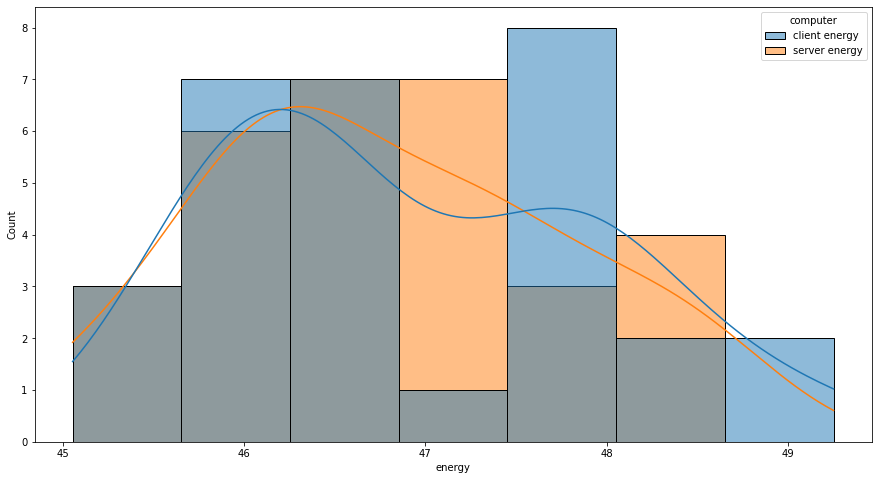

In [120]:
# seaborn

plt.figure(figsize=(15,8))
sns.histplot(data=df_energy_long, x='energy', hue="computer", kde=True)



plt.savefig('../Results-Energy/'+site+'-hist-energy.png')
plt.show()